In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


In [ ]:
# model.save('/kaggle/working/model.h5')


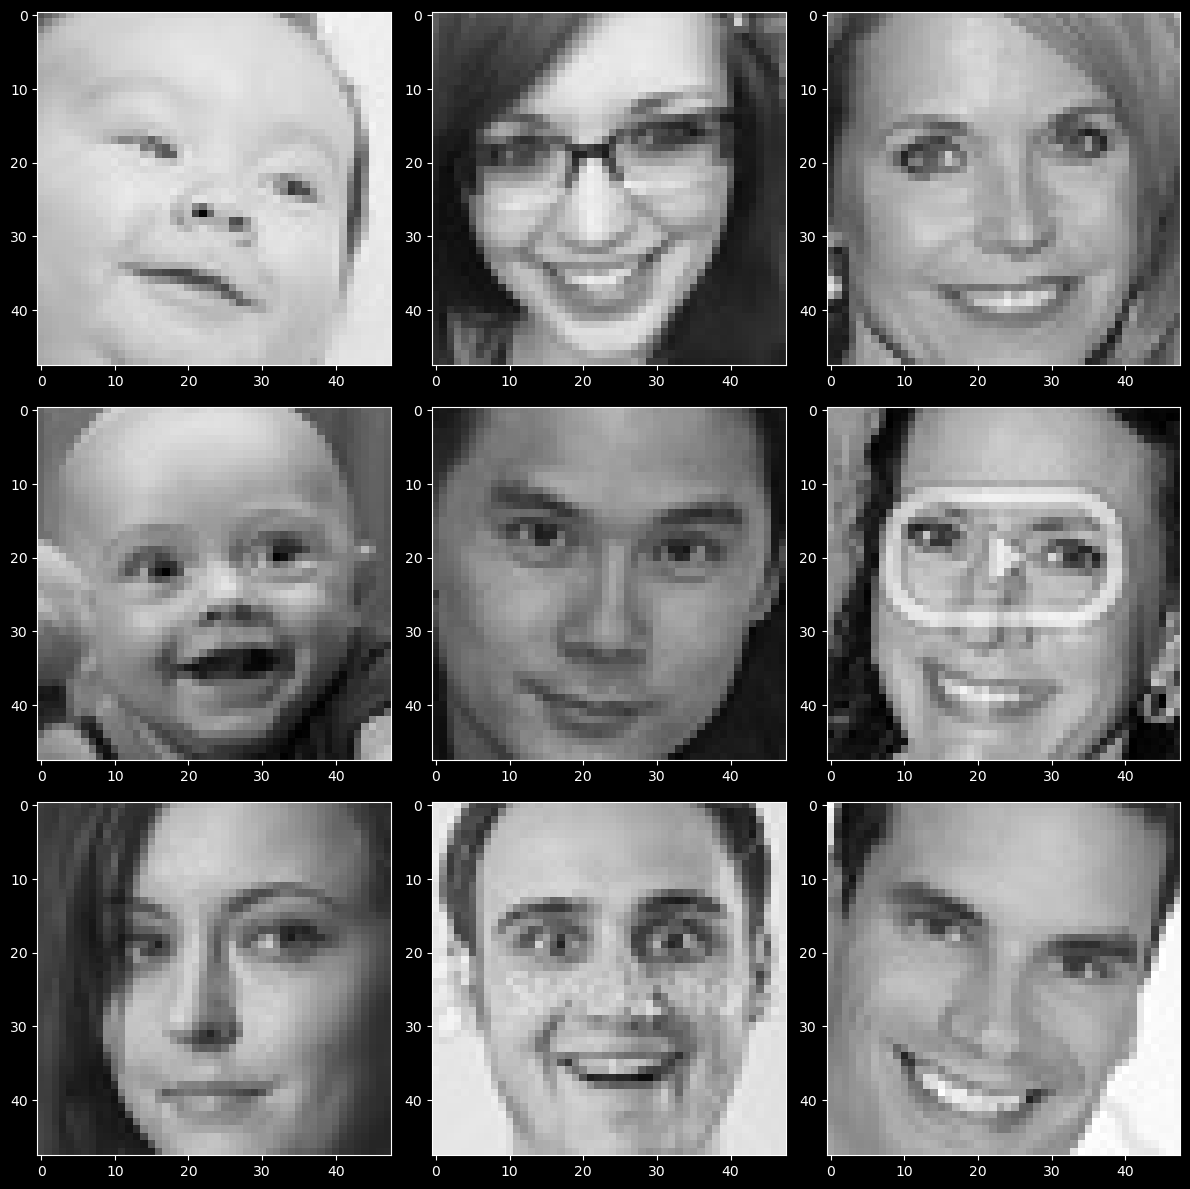

In [5]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os

expression = 'happy'
picture_size = 48
folder_path = "./images/train"

plt.style.use('dark_background')
plt.figure(figsize=(12, 12))
image_files = os.listdir(os.path.join(folder_path, expression))

for i in range(1,10,1):  
    plt.subplot(3, 3, i)
    img_path = os.path.join(folder_path, expression, image_files[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)

plt.tight_layout()
plt.show()


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
picture_size = 48

folder_path = "./images/train"

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


ImportError: cannot import name 'keras' from partially initialized module 'keras._tf_keras' (most likely due to a circular import) (/home/junu/miniconda3/envs/prod/lib/python3.12/site-packages/keras/_tf_keras/__init__.py)

In [60]:
no_of_classes = 7

model = Sequential()


#1st CNN Layer
model.add(Conv2D(64,(3,3),padding = 'same' ,input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN Layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3rd CNN Layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))




model.add(Flatten())


#fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))  

opt = Adam(learning_rate=0.0001)  
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,655,815 (21.58 MB)

 Trainable params: 5,652,871 (21.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [61]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint=ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')
early_stopping= EarlyStopping(monitor='val_loss',
                             min_delta=0,
                             patience=3,
                             verbose=1,
                             restore_best_weights=True)
reduce_learningrate=ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.0001)
callbacks_list=[early_stopping,checkpoint,reduce_learningrate,]
epochs = 48

In [ ]:

history=model.fit(train_set,
        steps_per_epoch=train_set.n//train_set.batch_size,
        epochs=epochs, 
        validation_data= test_set,
        validation_steps=test_set.n//test_set.batch_size,
        callbacks=callbacks_list)

Epoch 1/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.2480 - loss: 2.0057 - val_accuracy: 0.3895 - val_loss: 1.6038 - learning_rate: 1.0000e-04
Epoch 2/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.3750 - loss: 1.8221 - val_accuracy: 0.3888 - val_loss: 1.6050 - learning_rate: 1.0000e-04
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 535s 2s/step - accuracy: 0.3473 - loss: 1.7094 - val_accuracy: 0.3861 - val_loss: 1.6061 - learning_rate: 1.0000e-04
Epoch 4/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.3906 - loss: 1.6350 - val_accuracy: 0.3862 - val_loss: 1.6027 - learning_rate: 1.0000e-04
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - accuracy: 0.3867 - loss: 1.6029 - val_accuracy: 0.4119 - val_loss: 1.5889 - learning_rate: 1.0000e-04
Epoch 6/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.3828 - loss: 1.5555 - val_accuracy: 0.4143 - val_loss: 1.5794 - learning_rate: 1.0000e-04
Epoch 7/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step

In [ ]:

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Optimizer: Adam', fontsize=16) 
plt.ylabel('Loss', fontsize=10)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Optimizer: Adam', fontsize=16)  
plt.ylabel('Accuracy', fontsize=10)
plt.legend()

plt.show()
